In [2]:
import pandas as pd
import numpy as np
import datetime as dt

# File to Load
file_to_load = "JEOPARDY_CSV.csv"

# Read Purchasing File and store into Pandas data frame
jeopardy_df = pd.read_csv(file_to_load)

In [4]:
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [8]:
jeopardy_df.columns.str.rstrip().str.lstrip() # 1b cleaning the data
jeopardy_df.columns = jeopardy_df.columns.str.rstrip().str.lstrip()
print(jeopardy_df.columns)

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [9]:
jeopardy_df.describe() #1a there're 216930 rows, a row represents a jeopardy questions and other relevant information
#grain is a granularity of data. So the "grain" is a question

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


In [49]:
jeopardy_df["Year"] = pd.DatetimeIndex(jeopardy_df["Air Date"]).year
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year,Month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12


In [42]:
#1c --> unique shows by year
group_by_year = jeopardy_df.groupby("Year") #
shows_unique = group_by_year["Show Number"].nunique()
UniqueShows = {"Number of Unique Shows":shows_unique }
UniqueShows_df=pd.DataFrame(UniqueShows)
UniqueShows_df 

,Number of Unique Shows
Year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


In [43]:
#jeopardy_df["Show Number"].nunique() 

In [10]:
jeopardy_df["Category"].value_counts() #1d --> how many times each category was used.

BEFORE & AFTER                547
SCIENCE                       519
LITERATURE                    496
AMERICAN HISTORY              418
POTPOURRI                     401
                             ... 
LIFE & LITERATURE               1
2005 COMMENCEMENT SPEECHES      1
FADE INTO BOLIVIAN              1
17th CENTURY PERSONALITIES      1
POLITICAL NAMES                 1
Name: Category, Length: 27983, dtype: int64

In [26]:
jeopardy_df["Month"] = pd.DatetimeIndex(jeopardy_df["Air Date"]).month

In [28]:
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year,Month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,12,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,12,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12,12


In [38]:
group_by_month = jeopardy_df.groupby("Month") #
number_of_shows = group_by_month["Show Number"].count()
MyShows = {"Number of Shows":number_of_shows }
MyShows_df=pd.DataFrame(MyShows)
MyShows_df.sort_values("Number of Shows", ascending=False)
# 1e-->looks like November had the highest number of shows

,Number of Shows
Month,
11,25672
1,21128
5,21052
12,20875
10,20510
3,19731
4,19654
6,19331
2,17501


In [60]:
#1f
group_answers = jeopardy_df.groupby("Question")
Questions ={"Answers": group_answers["Answer"].count()}
Questions_df = pd.DataFrame(Questions)
Questions_df.sort_values("Answers", ascending=False).head(3)
# looks like the top 3 questions for the most common answers were audio clue, video clue, and filter

,Answers
Question,
[audio clue],17
[video clue],14
[filler],5


In [48]:
#2 --> Top 5 categories
categories = jeopardy_df["Category"].value_counts()
categories

BEFORE & AFTER                547
SCIENCE                       519
LITERATURE                    496
AMERICAN HISTORY              418
POTPOURRI                     401
                             ... 
LIFE & LITERATURE               1
2005 COMMENCEMENT SPEECHES      1
FADE INTO BOLIVIAN              1
17th CENTURY PERSONALITIES      1
POLITICAL NAMES                 1
Name: Category, Length: 27983, dtype: int64

In [44]:
categories_df.sort_values("Category", ascending=False).head(5)

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


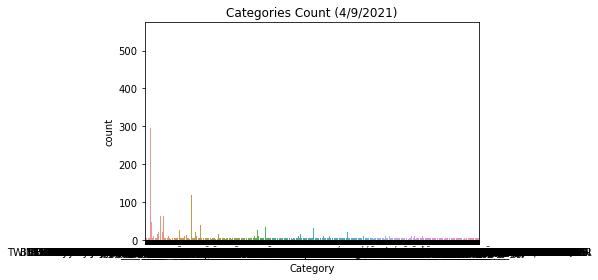

In [61]:
import seaborn as sns # this is my attempt to build a chart of value_counts but it seems not to work
import matplotlib.pyplot as plt
sns.countplot(x = "Category", data = jeopardy_df)
plt.title("Categories Count (4/9/2021)")
plt.show()